In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive/Dataset'

/content/drive/My Drive/Dataset


In [3]:
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec

In [4]:
reviews_df = pd.read_csv('Hotel_Review.csv')
print(reviews_df.dtypes)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [5]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

In [6]:
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

In [7]:
cleaned_positive_reviews = [clean(r) for r in positive_reviews]
cleaned_negative_reviews = [clean(r) for r in negative_reviews]

In [8]:
reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [9]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(p)
    else :
        reviews_text.append(n)
        reviews_text.append(p)

In [10]:
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

In [11]:
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)

In [12]:
dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [13]:
from keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec

text_reviews = [str(r) for r in reviews_text_df['reviews_text'].values]

sentences = []

for review in text_reviews:
    words = text_to_word_sequence(review)
    sentences.append(words)

embeddings_model = Word2Vec(sentences, min_count=1, sg=1, vector_size=128)

words = embeddings_model.wv.index_to_key
print('{} WORDS '.format(len(words)))
print('Printing first 100:')
print(words[:100])


76904 WORDS 
Printing first 100:
['the', 'and', 'was', 'to', 'a', 'room', 'in', 'very', 'staff', 'of', 'for', 'location', 'hotel', 'is', 'i', 'we', 'it', 'were', 'not', 'breakfast', 'good', 'with', 'great', 'but', 'on', 'at', 'friendly', 't', 'had', 'from', 'helpful', 'bed', 'no', 'nice', 'that', 'clean', 'rooms', 'have', 'you', 'as', 'there', 'this', 'so', 'our', 'comfortable', 'excellent', 'all', 'my', 'are', 'small', 'they', 'be', 'would', 'stay', 'nothing', 'service', 'really', 'bathroom', 'which', 'out', 'could', 'when', 'one', 'too', 'us', 'bar', 'only', 'lovely', 'an', 'everything', 'close', 's', 'also', 'shower', 'like', 'station', 'night', 'just', 'reception', 'if', 'well', 'bit', 'didn', 'or', 'little', 'get', 'perfect', 'more', 'by', 'food', 'time', 'view', 'area', 'me', 'walk', 'check', 'up', 'been', 'did', 'day']


In [14]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(text_reviews)
vocabSize = len(tokenizer.word_index) + 1
vocabSize

76905

In [15]:
vocabSize = len(tokenizer.word_index) + 1

# Recreating embeddings index based on Tokenizer vocabulary
word2vec_vocabulary = embeddings_model.wv.index_to_key
embeddingIndex = dict()
counter = 0
for word, i in tokenizer.word_index.items():
    if word in word2vec_vocabulary :
        embeddingIndex[word] = embeddings_model.wv[word]
    else:
        counter += 1

print("{} words without pre-trained embedding!".format(counter))


0 words without pre-trained embedding!


In [16]:
embeddingMatrix = zeros((vocabSize, 128))
for word, i in tokenizer.word_index.items():
    embeddingVector = embeddingIndex.get(word)
    if embeddingVector is not None:
        embeddingMatrix[i] = embeddingVector

In [17]:
reviews = [ str(r) for r in sentiment_df['reviews'].values]
labels = sentiment_df['labels'].values

for idx, review in enumerate(text_reviews):
    words = text_to_word_sequence(review)
    if(len(words) > 40):
        words = words[:40]
        text_reviews[idx] = ' '.join(words)

oneHotReviews = tokenizer.texts_to_sequences(reviews)
encodedReviews = keras.preprocessing.sequence.pad_sequences(oneHotReviews, maxlen=40, padding='post')

X_train, X_test, y_train, y_test = train_test_split(encodedReviews, labels, test_size=0.33, random_state=42)

In [18]:
from tensorflow.keras.layers import Bidirectional,Conv1D,LSTM,MaxPooling1D,Dropout
from tensorflow.keras.layers import Dense,Input,Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Embedding
from keras.preprocessing import sequence
from tensorflow.keras import backend
maxlen=40
max_features=40000
batch_size=32

print('Pad sequences (samples x time)')
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

Pad sequences (samples x time)
X_train shape: (11284, 40)
X_test shape: (5559, 40)


In [19]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [20]:
history=model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=4,
          validation_data=[X_test, y_test])

Epoch 1/4
353/353 [==============================] - 53s 138ms/step - loss: 0.3070 - accuracy: 0.8681 - val_loss: 0.1997 - val_accuracy: 0.9255
Epoch 2/4
353/353 [==============================] - 44s 125ms/step - loss: 0.1625 - accuracy: 0.9443 - val_loss: 0.1961 - val_accuracy: 0.9270
Epoch 3/4
353/353 [==============================] - 50s 140ms/step - loss: 0.1237 - accuracy: 0.9595 - val_loss: 0.2225 - val_accuracy: 0.9226
Epoch 4/4
353/353 [==============================] - 44s 125ms/step - loss: 0.1018 - accuracy: 0.9660 - val_loss: 0.2886 - val_accuracy: 0.9119


Epoch 1/4
353/353 [==============================] - 47s 134ms/step - loss: 0.0899 - accuracy: 0.9697 - val_loss: 0.2385 - val_accuracy: 0.9147
Epoch 2/4
353/353 [==============================] - 50s 143ms/step - loss: 0.0786 - accuracy: 0.9743 - val_loss: 0.2638 - val_accuracy: 0.9185
Epoch 3/4
353/353 [==============================] - 47s 134ms/step - loss: 0.0734 - accuracy: 0.9748 - val_loss: 0.2594 - val_accuracy: 0.9138
Epoch 4/4
353/353 [==============================] - 48s 136ms/step - loss: 0.0671 - accuracy: 0.9763 - val_loss: 0.3303 - val_accuracy: 0.9131


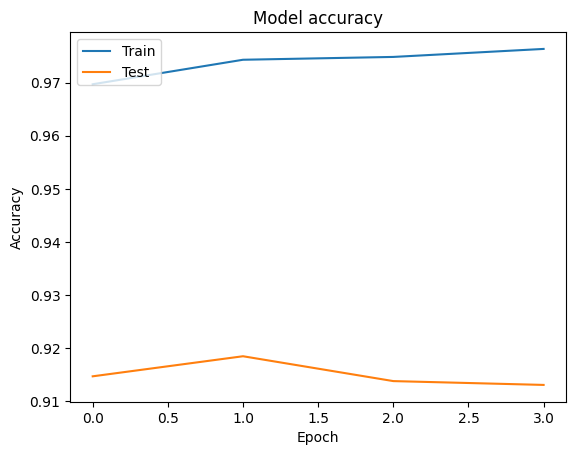

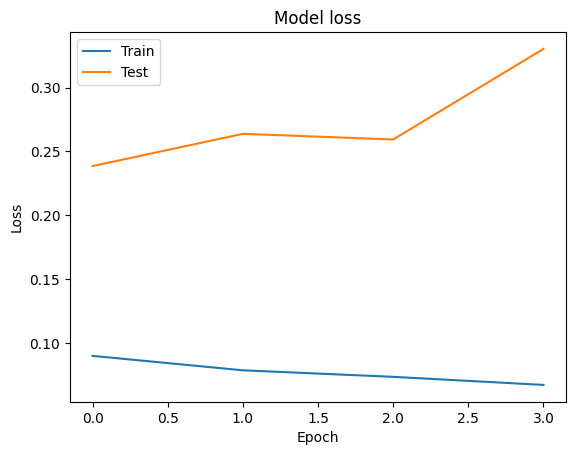

In [21]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=4,
                    validation_data=(X_test, y_test))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [22]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

174/174 [==============================] - 2s 13ms/step - loss: 0.3303 - accuracy: 0.9131
Test score: 0.3302917182445526
Test accuracy: 0.9131138920783997


174/174 [==============================] - 3s 12ms/step


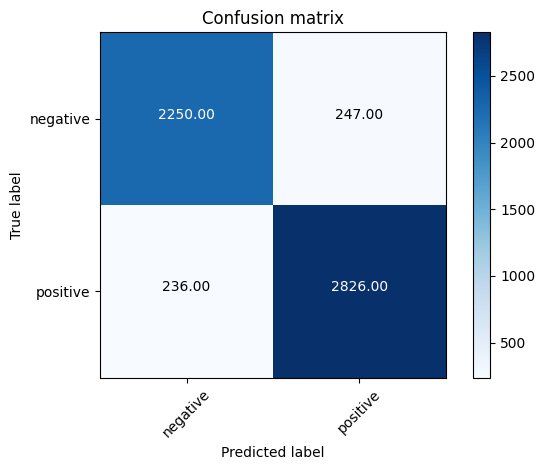

In [23]:
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype('int32')  # Assuming a threshold of 0.5

cm = confusion_matrix(y_test, predicted_classes, labels=[0, 1])
title = 'Confusion matrix'
cmap = plt.cm.Blues
classes = ["negative", "positive"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [24]:
# Convert continuous predictions to binary labels
binary_predictions = (predictions > 0.5).astype('int32')

# Generate classification report
report = classification_report(y_test, binary_predictions, target_names=['0','1'])
print(report)


              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2497
           1       0.92      0.92      0.92      3062

    accuracy                           0.91      5559
   macro avg       0.91      0.91      0.91      5559
weighted avg       0.91      0.91      0.91      5559



In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert continuous predictions to binary labels
binary_predictions = (predictions > 0.5).astype('int32')

# Compute metrics
accuracy = accuracy_score(y_test, binary_predictions)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, binary_predictions)
print('Precision: %f' % precision)

recall = recall_score(y_test, binary_predictions)
print('Recall: %f' % recall)

f1 = f1_score(y_test, binary_predictions)
print('F1 score: %f' % f1)


Accuracy: 0.913114
Precision: 0.919623
Recall: 0.922926
F1 score: 0.921271


Matthews Correlation Coefficient: 0.8243491248007999


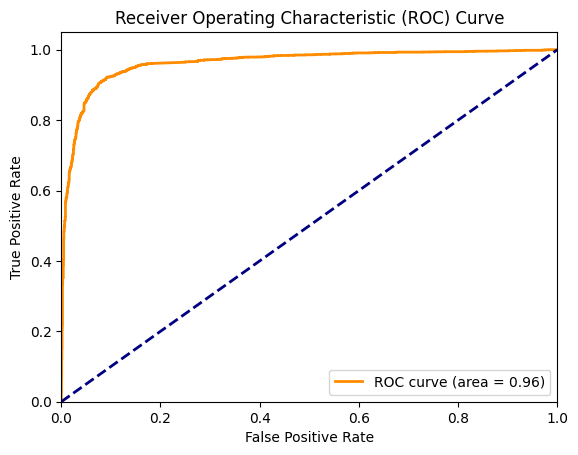

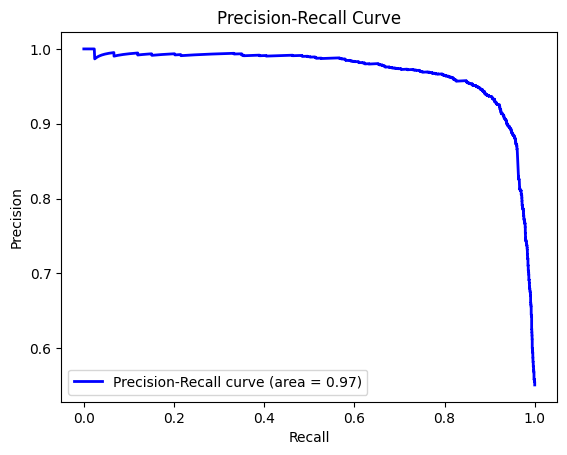

In [28]:
from sklearn.metrics import matthews_corrcoef, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, predicted_classes)
print("Matthews Correlation Coefficient:", mcc)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compute Precision-Recall curve and area under the curve
precision, recall, _ = precision_recall_curve(y_test, predictions)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


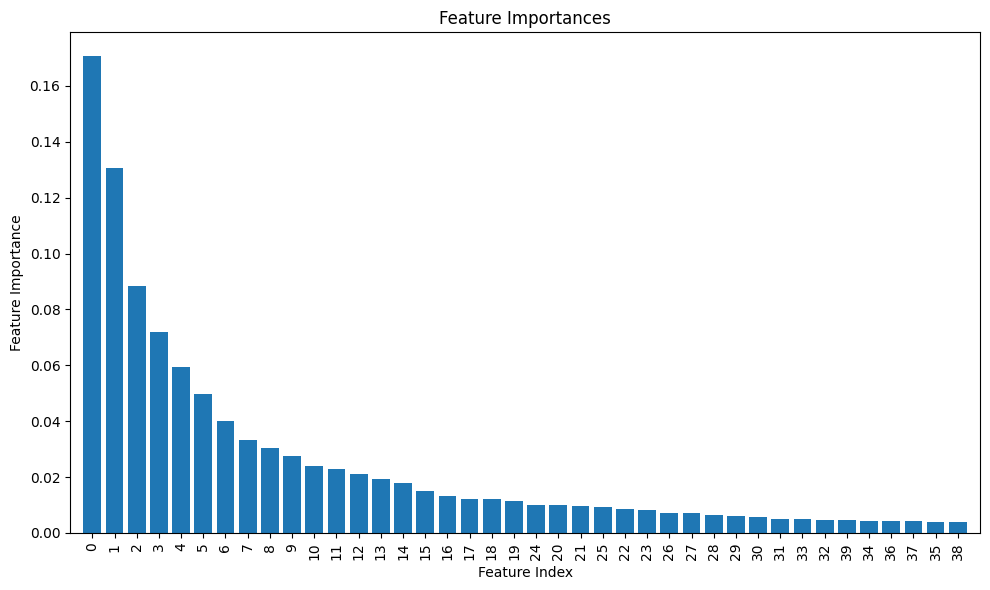

In [33]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained a RandomForestClassifier model named 'model'
# If you're using a different model, adjust accordingly
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices, rotation=90)  # Use indices as labels
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title("Feature Importances")
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()
